<a href="https://colab.research.google.com/github/Aviel26/Cpp/blob/main/Offensive_Tweet_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>How to know if tweet is offensive ?<h1>**

After learning on the analyse of several papers :
- *sentiment analysis using random forest algorithm-online social media based* / december-2019
-  *Random Forest Approach fo Sentiment Analysis in Indonesian Language* / October 2018
- *Evaluating Sentiment Analysis in the Context of Securities Trading* / 2016
- *Sentiment Analysis of Tweets using SVM* / 2017


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#pip install "tqdm>=4.9.0"

In [2]:
import pandas as pd
import numpy as np
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
import string

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Tweet_offensif_or_not/tweet_off_or_not.csv')
df = df.drop(['Unnamed: 0','task_2'], axis=1)
df.task_1 = df.task_1.map({'HOF' : 1, 'NOT' : 0})
df['text'][254]

"I no I'll be losing sleep over big Pharma CEOs &amp; stockholders being denied the ability to play #God and make billion$ off of the sick &amp; dying. Enough of #CovidBillionaires profiting off the deaths of the poor. #WTO #Biden #COVID19 #COVID19India #CovidVaccine #COVIDEmergency2021 https://t.co/35KmoXqAC0"

In [ ]:
df.head(5)

_id  ... task_1
0  60c5d6bf5659ea5e55defa2c  ...      1
1  60c5d6bf5659ea5e55def461  ...      1
2  60c5d6bf5659ea5e55defaad  ...      0
3  60c5d6bf5659ea5e55def419  ...      1
4  60c5d6bf5659ea5e55def7fa  ...      1

[5 rows x 3 columns]

In [ ]:
df.text.values

array(['@wealth if you made it through this &amp;&amp; were not only able to start making money for yourself but sustain living that way all from home, fuck these companies &amp; corporate pigs. power to the people, always.',
       "Technically that's still turning back the clock, dick head https://t.co/jbKaPJmpt1",
       "@VMBJP @BJP4Bengal @BJP4India @narendramodi @JPNadda @AmitShah @DilipGhoshBJP @RahulSinhaBJP And you're the govt?!?! Stop thinking about world media, liberal gangs or any optics whatsoever and ACT NOW already.  If this is what a person at your level is facing then shudder to think the plight of common people in Bengal. #BengalBurning",
       ...,
       "People didn't give 300+ seats majority to BJP to see #BengalBurning ... If they can't fix this, they hv no right to continue in office... Don't take our votes for granted @narendramodi ...",
       '@KanganaTeam This is such a vile, xenophobic and uneducated comment... Iâ€™m struggling to believe someone thinks li

In [ ]:
len(df.index.values)

3843

In [ ]:
#pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 21.7 MB/s 


In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')
from spellchecker import SpellChecker
spell = SpellChecker()

def correction(text):
  text = str(sp(text)).split()
  new = []
  new_word = ''
  for word in text :
    new_word = spell.unknown([word])
    if (len(new_word)) >0 :
      new_word = spell.correction(word)      
      new.append(new_word.lower())
    else :
      new.append(word.lower())

  return new

df_after_spell_check = df.copy()
df_after_spell_check['text'] = df_after_spell_check['text'].apply(correction)
#df_after_spell_check.to_pickle("/content/gdrive/MyDrive/Tweet_offensif_or_not/df_after_spell_check.pkl")

In [4]:
df_after_spell_check = pd.read_pickle("/content/drive/MyDrive/Tweet_offensif_or_not/df_after_spell_check.pkl")

In [5]:
df_after_spell_check

_id  ... task_1
0     60c5d6bf5659ea5e55defa2c  ...      1
1     60c5d6bf5659ea5e55def461  ...      1
2     60c5d6bf5659ea5e55defaad  ...      0
3     60c5d6bf5659ea5e55def419  ...      1
4     60c5d6bf5659ea5e55def7fa  ...      1
...                        ...  ...    ...
3838  60c5d6bf5659ea5e55defd57  ...      1
3839  60c5d6bf5659ea5e55def185  ...      1
3840  60c5d6bf5659ea5e55def78c  ...      1
3841  60c5d6bf5659ea5e55defb04  ...      1
3842  60c5d6bf5659ea5e55defb8a  ...      0

[3843 rows x 3 columns]

In [6]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
def stemm(text):
    return [porter_stemmer.stem(word) for word in text ]   

df_after_spell_check['text'] = df_after_spell_check['text'].apply(stemm)
df_after_spell_check

_id  ... task_1
0     60c5d6bf5659ea5e55defa2c  ...      1
1     60c5d6bf5659ea5e55def461  ...      1
2     60c5d6bf5659ea5e55defaad  ...      0
3     60c5d6bf5659ea5e55def419  ...      1
4     60c5d6bf5659ea5e55def7fa  ...      1
...                        ...  ...    ...
3838  60c5d6bf5659ea5e55defd57  ...      1
3839  60c5d6bf5659ea5e55def185  ...      1
3840  60c5d6bf5659ea5e55def78c  ...      1
3841  60c5d6bf5659ea5e55defb04  ...      1
3842  60c5d6bf5659ea5e55defb8a  ...      0

[3843 rows x 3 columns]

In [7]:
df_after_spell_check['text'] = df_after_spell_check['text'].apply(lambda x: ' '.join(x))
df_after_spell_check

_id  ... task_1
0     60c5d6bf5659ea5e55defa2c  ...      1
1     60c5d6bf5659ea5e55def461  ...      1
2     60c5d6bf5659ea5e55defaad  ...      0
3     60c5d6bf5659ea5e55def419  ...      1
4     60c5d6bf5659ea5e55def7fa  ...      1
...                        ...  ...    ...
3838  60c5d6bf5659ea5e55defd57  ...      1
3839  60c5d6bf5659ea5e55def185  ...      1
3840  60c5d6bf5659ea5e55def78c  ...      1
3841  60c5d6bf5659ea5e55defb04  ...      1
3842  60c5d6bf5659ea5e55defb8a  ...      0

[3843 rows x 3 columns]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
from nltk.probability import FreqDist
list_str = df_after_spell_check['text'].tolist()
list_str


['wealth if you made it through thi &amp;&amp; were not onli abl to start make money for yourself but sustain live that way all from home fuck these compani camp corpor pig power to the peopl alway',
 "technic that' still turn back the clock dick head https://t.co/jbkapjmpt1",
 "@vmbjp @bjp4bengal @bjp4india @narendramodi @jpnadda @amitshah @dilipghoshbjp @rahulsinhabjp and you'r the govt?!?! stop think about world media liber gang or ani optic whatsoev and act now alreadi if thi is what a person at your level is face then shudder to think the plight of common peopl in bengali #bengalburn",
 '@krtoprak_yigit soldier of japan who ha dick head',
 "@blueheartedli you'd be better off ask who doesn't think he' a sleazi shitbag lao",
 '@ilyhiguchi dick',
 'whi to blame onli modi or govern for thi corona mess when we all are equal respons #narendramodi #covidsecondwaveinindia #coronaviru #indiacovidcrisi',
 'the report on @theleadcnn that @clarissaward file from india regard the dire couid ca

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidfvectorizer = TfidfVectorizer(analyzer='word')

In [11]:
tfidf_wm = tfidfvectorizer.fit_transform(list_str)

In [12]:
tweet = []
for i in range(len(list_str)):
  tweet.append(f'Tweet{i}')
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = tweet,columns = tfidf_tokens)
pd.set_option('max_columns', None)
display(df_tfidfvect.iloc[:4])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  00026  002  007shoebkhan   01  01kxvm3u2t  02in6wxbgn   03  \
Tweet0  0.0  0.0    0.0  0.0           0.0  0.0         0.0         0.0  0.0   
Tweet1  0.0  0.0    0.0  0.0           0.0  0.0         0.0         0.0  0.0   
Tweet2  0.0  0.0    0.0  0.0           0.0  0.0         0.0         0.0  0.0   
Tweet3  0.0  0.0    0.0  0.0           0.0  0.0         0.0         0.0  0.0   

        035  03_bara_  03hannah11  04lqwbicin  05d4e8zpn0  06q0c24sf6   07  \
Tweet0  0.0       0.0         0.0         0.0         0.0         0.0  0.0   
Tweet1  0.0       0.0         0.0         0.0         0.0         0.0  0.0   
Tweet2  0.0       0.0         0.0         0.0         0.0         0.0  0.0   
Tweet3  0.0       0.0         0.0         0.0         0.0         0.0  0.0   

        0c1kuurt2k  0cgxjp8bpo  0ef6swxivg  0gotfqbcbi  0idmea4oec  \
Tweet0         0.0         0.0         0.0         0.0         0.0   
Tweet1         0.0         0.0         0.0         0.0         0.0   
Tweet2         0.0         0.0         0.0         0.0         0.0   
Tweet3         0.0         0.0         0.0         0.0         0.0   

        0ijbzhdvq1  0jq2a5dfz3  0km7wjzrku  0komwnexga  0nvqlu0nhd  \
Tweet0         0.0         0.0         0.0         0.0         0.0   
Tweet1         0.0         0.0         0.0         0.0         0.0   
Tweet2         0.0         0.0         0.0         0.0         0.0   
Tweet3         0.0         0.0         0.0         0.0         0.0   

        0oaz0av95c  0oedttpm3v  0qfmltaayv  0u5ywuvovj  0ueylefhqz  \
Tweet0         0.0         0.0         0.0         0.0         0.0   
Tweet1         0.0         0.0         0.0         0.0         0.0   
Tweet2         0.0         0.0         0.0         0.0         0.0   
Tweet3         0.0         0.0         0.0         0.0         0.0   

        0uhwy8yzgx  0v7ljec1uj  0vdc3p5fhq  0xpolygon   10  100  1000  100cr  \
Tweet0         0.0         0.0         0.0        0.0  0.0  0.0   0.0    0.0   
Tweet1         0.0         0.0         0.0        0.0  0.0  0.0   0.0    0.0   
Tweet2         0.0         0.0         0.0        0.0  0.0  0.0   0.0    0.0   
Tweet3         0.0         0.0         0.0        0.0  0.0  0.0   0.0    0.0   

        100k  102  103  105  1075  10903  10k  10ywbgxh5h   11  112  117  \
Tweet0   0.0  0.0  0.0  0.0   0.0    0.0  0.0         0.0  0.0  0.0  0.0   
Tweet1   0.0  0.0  0.0  0.0   0.0    0.0  0.0         0.0  0.0  0.0  0.0   
Tweet2   0.0  0.0  0.0  0.0   0.0    0.0  0.0         0.0  0.0  0.0  0.0   
Tweet3   0.0  0.0  0.0  0.0   0.0    0.0  0.0         0.0  0.0  0.0  0.0   

        11pm   12  125ger  12k  12km  12xzwxzgyi   13  1300  132   14  140  \
Tweet0   0.0  0.0     0.0  0.0   0.0         0.0  0.0   0.0  0.0  0.0  0.0   
Tweet1   0.0  0.0     0.0  0.0   0.0         0.0  0.0   0.0  0.0  0.0  0.0   
Tweet2   0.0  0.0     0.0  0.0   0.0         0.0  0.0   0.0  0.0  0.0  0.0   
Tweet3   0.0  0.0     0.0  0.0   0.0         0.0  0.0   0.0  0.0  0.0  0.0   

        140cr  144   15  150  157   16  16mib2qdnb   17  1777   18  180  1800  \
Tweet0    0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  0.0  0.0   0.0   
Tweet1    0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  0.0  0.0   0.0   
Tweet2    0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  0.0  0.0   0.0   
Tweet3    0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  0.0  0.0   0.0   

        1800â   19  192  1961  1965  1969  1989  1990  1997  19ð  \
Tweet0    0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
Tweet1    0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
Tweet2    0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   
Tweet3    0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   

        1adtviqd3tdon2n  1bsrsvagsz  1cyupkjw6l  1dldca5v20  1edshxp1rt  \
Tweet0              0.0         0.0         0.0         0.0         0.0   
Tweet1              0.0         0.0         0.0         0.0         0.0   
Tweet2             

In [40]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,1), max_features=500)
# convert th documents into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(list_str)
tfidf_wm


<3843x500 sparse matrix of type '<class 'numpy.float64'>'
	with 59044 stored elements in Compressed Sparse Row format>

In [41]:
tweet = []
for i in range(len(list_str)):
  tweet.append(f'Tweet{i}')
tfidf_tokens = tfidfvectorizer.get_feature_names_out ()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = tweet,columns = tfidf_tokens)
pd.set_option('max_columns', None)
display(df_tfidfvect.iloc[:4])

19     about  absolut  accept  account       act  action  actual  \
Tweet0  0.0  0.000000      0.0     0.0      0.0  0.000000     0.0     0.0   
Tweet1  0.0  0.000000      0.0     0.0      0.0  0.000000     0.0     0.0   
Tweet2  0.0  0.149557      0.0     0.0      0.0  0.216933     0.0     0.0   
Tweet3  0.0  0.000000      0.0     0.0      0.0  0.000000     0.0     0.0   

        after  again  against  agre      all  allow  almost   alreadi  also  \
Tweet0    0.0    0.0      0.0   0.0  0.15547    0.0     0.0  0.000000   0.0   
Tweet1    0.0    0.0      0.0   0.0  0.00000    0.0     0.0  0.000000   0.0   
Tweet2    0.0    0.0      0.0   0.0  0.00000    0.0     0.0  0.219847   0.0   
Tweet3    0.0    0.0      0.0   0.0  0.00000    0.0     0.0  0.000000   0.0   

           alway   am  amitshah   an       and  andto       ani  anoth  anyon  \
Tweet0  0.250026  0.0  0.000000  0.0  0.000000    0.0  0.000000    0.0    0.0   
Tweet1  0.000000  0.0  0.000000  0.0  0.000000    0.0  0.000000    0.0    0.0   
Tweet2  0.000000  0.0  0.204924  0.0  0.164338    0.0  0.178014    0.0    0.0   
Tweet3  0.000000  0.0  0.000000  0.0  0.000000    0.0  0.000000    0.0    0.0   

        anyth  are  around   as  asham  ask  ass  asshol        at  attack  \
Tweet0    0.0  0.0     0.0  0.0    0.0  0.0  0.0     0.0  0.000000     0.0   
Tweet1    0.0  0.0     0.0  0.0    0.0  0.0  0.0     0.0  0.000000     0.0   
Tweet2    0.0  0.0     0.0  0.0    0.0  0.0  0.0     0.0  0.146945     0.0   
Tweet3    0.0  0.0     0.0  0.0    0.0  0.0  0.0     0.0  0.000000     0.0   

        away      back  bad  bastard   be  becaus  becom  bed  been  befor  \
Tweet0   0.0  0.000000  0.0      0.0  0.0     0.0    0.0  0.0   0.0    0.0   
Tweet1   0.0  0.399474  0.0      0.0  0.0     0.0    0.0  0.0   0.0    0.0   
Tweet2   0.0  0.000000  0.0      0.0  0.0     0.0    0.0  0.0   0.0    0.0   
Tweet3   0.0  0.000000  0.0      0.0  0.0     0.0    0.0  0.0   0.0    0.0   

        believ  bengal  bengalburn   bengali  bengalviol  best  better  big  \
Tweet0     0.0     0.0    0.000000  0.000000         0.0   0.0     0.0  0.0   
Tweet1     0.0     0.0    0.000000  0.000000         0.0   0.0     0.0  0.0   
Tweet2     0.0     0.0    0.146945  0.217881         0.0   0.0     0.0  0.0   
Tweet3     0.0     0.0    0.000000  0.000000         0.0   0.0     0.0  0.0   

        bitch  bjp4india  bjpdestroyedindia  blame  bloodi  bodi  bollock  \
Tweet0    0.0   0.000000                0.0    0.0     0.0   0.0      0.0   
Tweet1    0.0   0.000000                0.0    0.0     0.0   0.0      0.0   
Tweet2    0.0   0.196288                0.0    0.0     0.0   0.0      0.0   
Tweet3    0.0   0.000000                0.0    0.0     0.0   0.0      0.0   

        bop  both  break  busi      but   by  call      camp  can  canâ  care  \
Tweet0  0.0   0.0    0.0   0.0  0.14724  0.0   0.0  0.185151  0.0   0.0   0.0   
Tweet1  0.0   0.0    0.0   0.0  0.00000  0.0   0.0  0.000000  0.0   0.0   0.0   
Tweet2  0.0   0.0    0.0   0.0  0.00000  0.0   0.0  0.000000  0.0   0.0   0.0   
Tweet3  0.0   0.0    0.0   0.0  0.00000  0.0   0.0  0.000000  0.0   0.0   0.0   

        case  caus  celebr  china  chines  chineseviru  citizen        co  \
Tweet0   0.0   0.0     0.0    0.0     0.0          0.0      0.0  0.000000   
Tweet1   0.0   0.0     0.0    0.0     0.0          0.0      0.0  0.177457   
Tweet2   0.0   0.0     0.0    0.0     0.0          0.0      0.0  0.000000   
Tweet3   0.0   0.0     0.0    0.0     0.0          0.0      0.0  0.000000   

        come  commun  complet  concern  continu  control  corona  couid  \
Tweet0   0.0     0.0      0.0      0.0      0.0      0.0     0.0    0.0   
Tweet1   0.0     0.0      0.0      0.0      0.0      0.0     0.0    0.0   
Tweet2   0.0     0.0      0.0      0.0      0.0      0.0     0.0    0.0   
Tweet3   0.0     0.0      0.0      0.0      0.0      0.0     0.0    0.0   

        could  countri  covid  covid19  covid19india  covidindia  covidvaccin  \
Tweet0  

In [42]:
list_features = list(df_tfidfvect.columns)

In [ ]:
#df_tfidfvect.to_csv(r"/content/gdrive/MyDrive/Tweet_offensif_or_not/df_tfidfvect.csv")
#df['task_1'].to_csv(r"/content/gdrive/MyDrive/Tweet_offensif_or_not/df_task1.csv")

In [ ]:
#import pandas as pd
#df_tfidfvect = pd.read_csv('/content/gdrive/MyDrive/Tweet_offensif_or_not/df_tfidfvect.csv')

In [ ]:
#df = pd.read_csv('/content/gdrive/MyDrive/Tweet_offensif_or_not/df_task1.csv')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_tfidfvect, df['task_1'], test_size=0.2, random_state=10)
print(len(X_train.index),
len(X_test.index))

3074 769


<h1>Base Model : Naïve Bayse

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf_multi = MultinomialNB().fit(X_train, y_train)
predicted= clf_multi.predict(X_test)

print("MultinomialNB f1-score:", metrics.f1_score(y_test, predicted, average='macro'))
print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))

MultinomialNB f1-score: 0.683876244283024
MultinomialNB Accuracy: 0.7516254876462939


<h2> Learning Curve Naïve Bayse

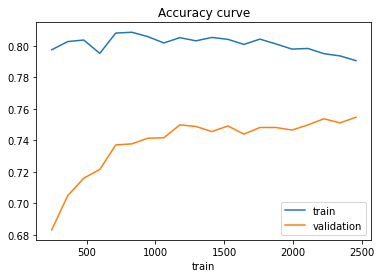

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf_multi, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.xlabel('train')
plt.title('Accuracy curve')
plt.legend()

<h1> Random Forest classifier model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier()
acc_scorer = make_scorer( metrics.f1_score)

parameters = {'n_estimators': [50, 70, 200],'criterion': ['entropy'], 'max_depth': [50,100, 500]}

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)
clf_forest = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf_forest.fit(X_train, y_train)
print('F1 train : ', clf_forest.score(X_train,y_train))
print('F1 test : ',clf_forest.score(X_test,y_test))

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=200)
F1 train :  0.9808067664281067
F1 test :  0.7685305591677504


<h2>Random forest learning curve F1

[ 245  362  478  595  711  828  944 1061 1177 1294 1410 1527 1643 1760
 1876 1993 2109 2226 2342 2459]


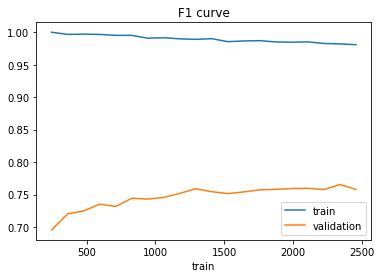

In [56]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf_forest, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.title('F1 curve')
plt.xlabel('train')
plt.legend()

<h1>The Logistic Model

In [64]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty': ['l1'],'solver': ['liblinear'],
              'max_iter': [30,90, 150], 'C' : [0.5, 0.85]}

grid_obj = GridSearchCV(LogisticRegression(), parameters, scoring=acc_scorer, cv=8, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)
clf_logistic = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
y_pred_train = clf_logistic.predict(X_train)
print("Logistic train", metrics.f1_score(y_train, y_pred_train, average='macro'))
print("Logistic test", metrics.f1_score(y_test, y_pred, average='macro'))
print("Logistic Accuracy:", accuracy_score(y_test, y_pred))

LogisticRegression(C=0.85, max_iter=30, penalty='l1', solver='liblinear')
Logistic train 0.7817661094545971
Logistic test 0.7401703625984741
Logistic Accuracy: 0.7776332899869961


<h2> Learning Curve logistic f1

[ 245  362  478  595  711  828  944 1061 1177 1294 1410 1527 1643 1760
 1876 1993 2109 2226 2342 2459]


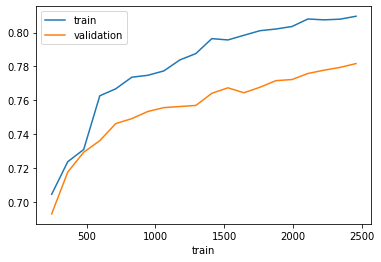

In [68]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf_logistic, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.xlabel('train')
plt.legend()

<h1> We notice that in Logistic Model, with more data there is the potential to increase

<h1> SVC classifier model

In [94]:
from sklearn import svm
parameters = {'kernel' : ['poly'], 'C' : [1], 'degree' : [2]}

grid_obj = GridSearchCV(svm.SVC(probability=True), parameters, scoring=acc_scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)
clf_SVC = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf_SVC.fit(X_train, y_train)
y_pred = clf_SVC.predict(X_test)
y_pred_train = clf_SVC.predict(X_train)
print("SVM train", metrics.f1_score(y_train, y_pred_train, average='macro'))
print("SVM test", metrics.f1_score(y_test, y_pred, average='macro'))

SVC(C=1, degree=2, kernel='poly', probability=True)
SVM train 0.9713466426643897
SVM test 0.7473677294305097


<h1>SVC classifier learning curve

[ 245  362  478  595  711  828  944 1061 1177 1294 1410 1527 1643 1760
 1876 1993 2109 2226 2342 2459]


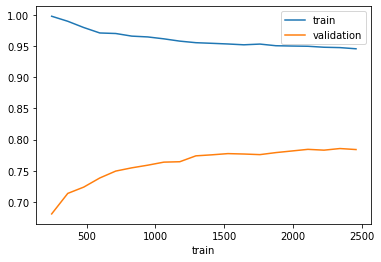

In [70]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf_SVC, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.xlabel('train')
plt.legend()

<h1>SGD classifier

In [89]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
grid = {
    'alpha': [1e-3, 1e-2, 1e-4, 1e-5, 1e-6], # learning rate
    'max_iter': [10_000, 100_000, 1000_0000], # number of epochs
    'loss': ['hinge'], # logistic regression,
    'penalty': ['l1','l2'],
    'n_jobs': [-1]
}

grid_obj = GridSearchCV(SGD, grid, scoring=acc_scorer, cv=8)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("SGD", metrics.f1_score(y_test, y_pred, average='macro'))
print("SGD train", metrics.f1_score(y_pred_train, y_train, average='macro'))






SGDClassifier(alpha=0.001, max_iter=10000, n_jobs=-1)
SGD 0.728182613063457
SGD train 0.7700027894495116


<h2>SGD Curve

[ 245  362  478  595  711  828  944 1061 1177 1294 1410 1527 1643 1760
 1876 1993 2109 2226 2342 2459]


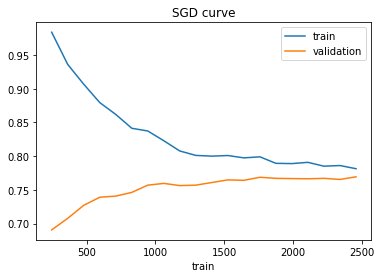

In [73]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.title('SGD curve')
plt.xlabel('train')
plt.legend()

In [81]:
import xgboost as xgb
matr = df_tfidfvect.copy()
X = matr.to_numpy()
y = df['task_1'].to_numpy()
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [82]:
xg_reg = xgb.XGBClassifier(objective= 'binary:logistic')
parameters = {
    'max_depth': [30],
    'n_estimators': [200],
    'learning_rate': [0.1],
    'n_jobs': [-1]
}
grid_obj = GridSearchCV(xg_reg, parameters, scoring=acc_scorer, cv=8, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)
clf_Boost = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf_Boost .fit(X_train, y_train)
y_pred = clf_Boost .predict(X_test)
y_pred_train = clf_Boost .predict(X_train)
print("XGB train", metrics.f1_score(y_pred_train, y_train, average='macro'))
print("XGB test", metrics.f1_score(y_test, y_pred, average='macro'))


XGBClassifier(max_depth=30, n_estimators=200, n_jobs=-1)
XGB train 0.9960636296445218
XGB test 0.7626658384852045


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
N, train_score, val_score = learning_curve(clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label = 'train')
plt.plot(N, val_score.mean(axis=1), label = 'validation')
plt.xlabel('train')
plt.legend()

In [ ]:

from sklearn.externals import joblib

# SGD
#joblib.dump(clf, '/content/gdrive/MyDrive/Tweet_offensif_or_not/Naive_bayse.pkl') 

# logistic
#joblib.dump(clf_logistic, '/content/gdrive/MyDrive/Tweet_offensif_or_not/Logistic.pkl')

# SVC
#joblib.dump(clf_SVC, '/content/gdrive/MyDrive/Tweet_offensif_or_not/SVC.pkl')

# Random Forest
#joblib.dump(clf_forest, '/content/gdrive/MyDrive/Tweet_offensif_or_not/Random_Forest.pkl')

In [ ]:
#from sklearn.externals import joblib
#
#Naive_bayse = joblib.load('/content/gdrive/MyDrive/Tweet_offensif_or_not/Naive_bayse.pkl')
#logistic = joblib.load('/content/gdrive/MyDrive/Tweet_offensif_or_not/Logistic.pkl')
#svclassifier = joblib.load('/content/gdrive/MyDrive/Tweet_offensif_or_not/SVC.pkl')
#clf_forest = ('/content/gdrive/MyDrive/Tweet_offensif_or_not/Random_Forest.pkl')

In [99]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier([                                                      
                                 ('clf_forest', clf_forest),
                                 ('XGB', clf_Boost)
                                 ], 
                                voting = 'hard')


voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print("Voting f1", metrics.f1_score(y_test, y_pred, average='macro'))
print("Voting Accuracy", accuracy_score(y_test, y_pred))

Voting f1 0.765613947648395
Voting Accuracy 0.7932379713914174


In [185]:
model_PCA = PCA(n_components=2)
Matrix_Reduce = model_PCA.fit_transform(df_tfidfvect)
#df['task_1']

In [186]:
Matrix_Reduce.shape

(3843, 2)

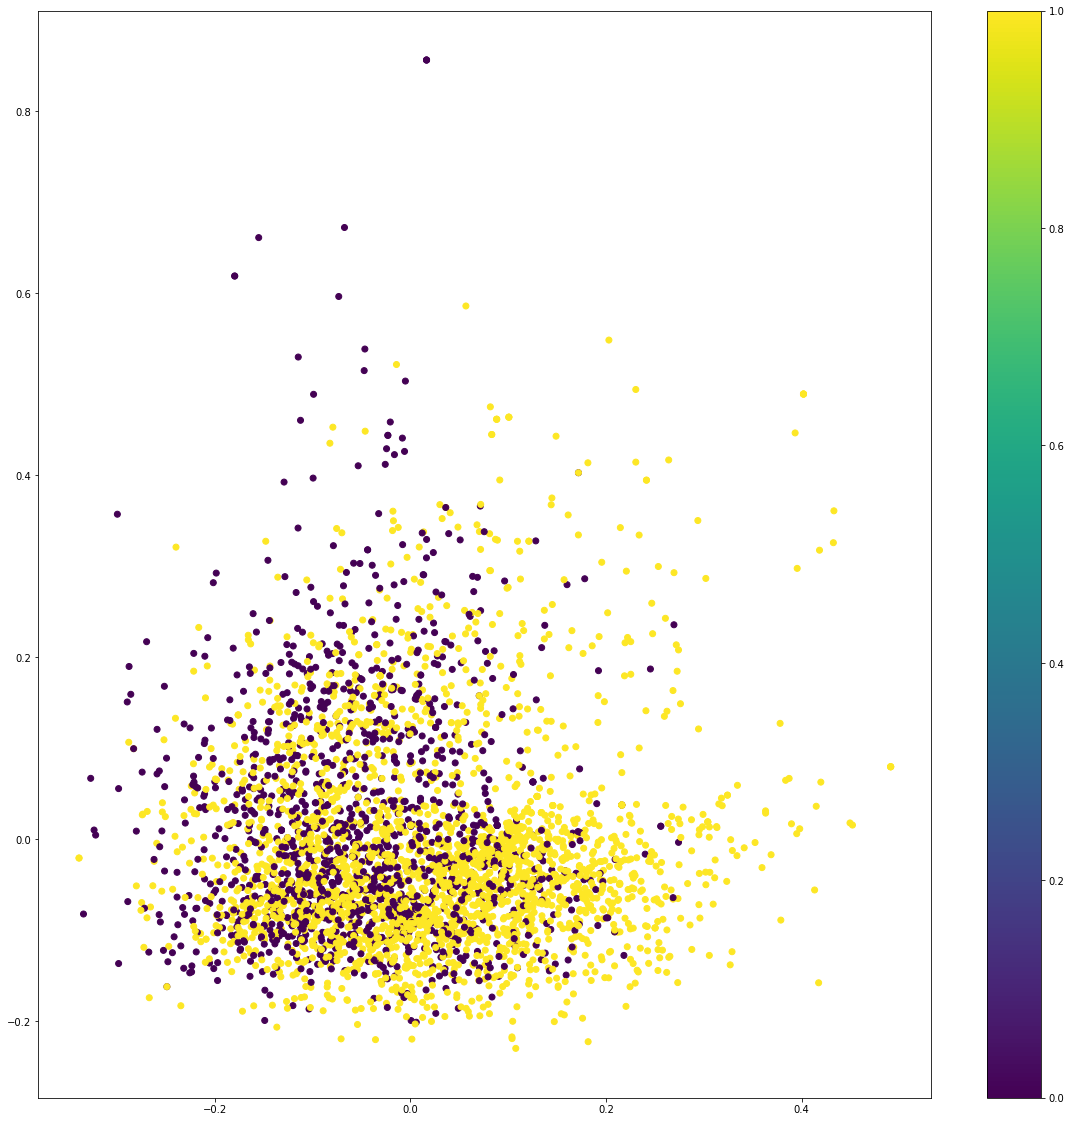

In [187]:
plt.figure(figsize=(20,20))

plt.scatter(Matrix_Reduce[:,0], Matrix_Reduce[:,1] , c=df['task_1'])
plt.colorbar()


**<h2>The plot allows us to observe the complexity of the language.
It is clear that classifying a tweet as offensive or not is not limited to one, two, or three words, it is much more complex. This is why a PCA = 2 cannot reveal the two offensive and non-offensive clusters that we are looking for.**

<h1> Doc2Vec. Can we highlight a graphic difference between the comments with doc2vec?

In [102]:
from tqdm.notebook import tqdm_notebook
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [103]:
tagged_data = []

for i,_d in tqdm_notebook(enumerate(list_str)):
    tagged_data.append(TaggedDocument(words=word_tokenize(_d), tags=[str(i)]))    

0it [00:00, ?it/s]

In [106]:
tagged_data[:5]

[TaggedDocument(words=['wealth', 'if', 'you', 'made', 'it', 'through', 'thi', '&', 'amp', ';', '&', 'amp', ';', 'were', 'not', 'onli', 'abl', 'to', 'start', 'make', 'money', 'for', 'yourself', 'but', 'sustain', 'live', 'that', 'way', 'all', 'from', 'home', 'fuck', 'these', 'compani', 'camp', 'corpor', 'pig', 'power', 'to', 'the', 'peopl', 'alway'], tags=['0']),
 TaggedDocument(words=['technic', 'that', "'", 'still', 'turn', 'back', 'the', 'clock', 'dick', 'head', 'https', ':', '//t.co/jbkapjmpt1'], tags=['1']),
 TaggedDocument(words=['@', 'vmbjp', '@', 'bjp4bengal', '@', 'bjp4india', '@', 'narendramodi', '@', 'jpnadda', '@', 'amitshah', '@', 'dilipghoshbjp', '@', 'rahulsinhabjp', 'and', "you'r", 'the', 'govt', '?', '!', '?', '!', 'stop', 'think', 'about', 'world', 'media', 'liber', 'gang', 'or', 'ani', 'optic', 'whatsoev', 'and', 'act', 'now', 'alreadi', 'if', 'thi', 'is', 'what', 'a', 'person', 'at', 'your', 'level', 'is', 'face', 'then', 'shudder', 'to', 'think', 'the', 'plight', 'of

In [117]:
vec_size = 300

model = Doc2Vec(vector_size=vec_size,
                min_count=10,
                epochs=1000,  
                alpha = 0.01,
                dm =3)
  

In [118]:
model.build_vocab(tagged_data)

In [119]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [120]:
list_vector = []

for i in range(len(tagged_data)):
  list_vector.append(model[f'{i}'])



In [178]:
Matrix_vector_Doc2Vec = np.array(list_vector)

In [179]:
Matrix_vector_Doc2Vec.shape

(3843, 300)

In [180]:
from sklearn.decomposition import PCA

In [182]:
model_PCA = PCA(n_components=2)
Matrix_Reduce = model_PCA.fit_transform(Matrix_vector_Doc2Vec)

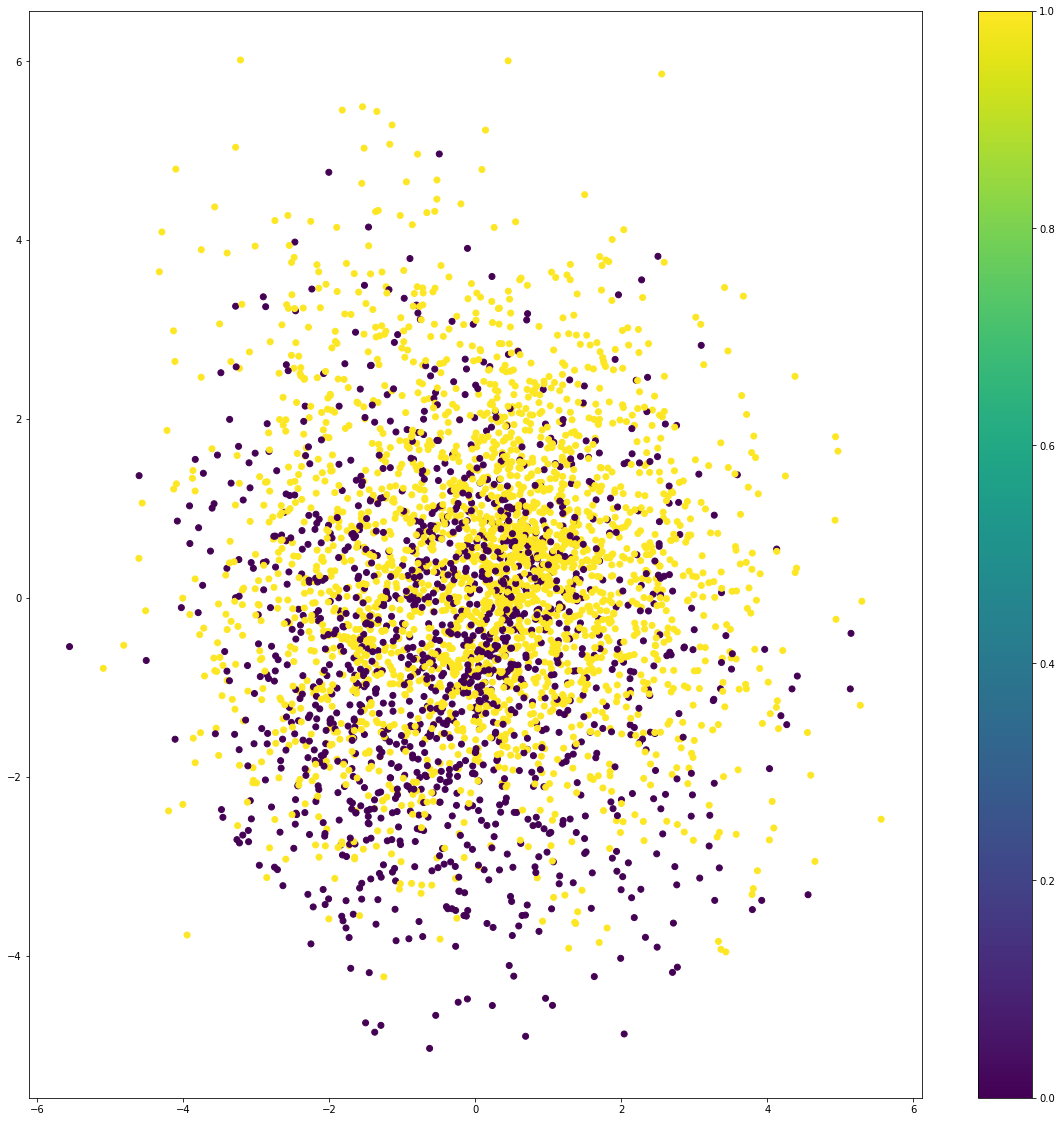

In [184]:
plt.figure(figsize=(20,20))
plt.scatter(Matrix_Reduce[:,0], Matrix_Reduce[:,1] , c=df['task_1'])
plt.colorbar()



Also with word2vec and With PCA = 2 ,  we can't graphically point a major difference between the offensive and not offensive tweets.

** <h1> Conclusion: we have created several models allowing us to be able to identify if a tweet is offensive. The difficulty of this study is on the one hand the complexity of the task. According to what criteria do we scaracterize? If there is an insult? Racism? are we talking about drugs? Threat ? On the other hand, the way it is written, misspellings, words pasted between aux, emoticons.At first, I did a basic spelling correction that of Norvig: (https://norvig.com/spell-correct.html), then after launching several models, the random forest was the most relevant with a precision f1 = 0.7685 on the test.In addition, the Voting classifier gave us a precision f1 = 0.7656 and an accuracy = 0.793. Finally the different plots allowed me to highlight the multiple dimensions that are involved in the categorization of a tweet as offensive or not and not just a small number of dimensions.**